<a href="https://colab.research.google.com/github/kasprowski/deeplearning/blob/master/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Loading data

Loaded:  4898


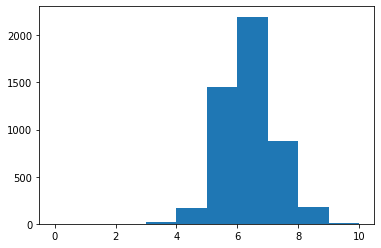

In [ ]:
data = pd.read_csv('winequality-white.csv',sep=';')
print("Loaded: ",len(data))
samples = data.values[:,0:10]
labels = data.values[:,11]

plt.hist(labels,bins=10,range=(0,10))
plt.show()

# The simplest classification

In [ ]:
model = KNeighborsClassifier()
samples = data.values[:,0:10]
labels = data.values[:,11]
model.fit(samples, labels)    

import random
i = random.randrange(len(labels))
predicted = model.predict(samples[i].reshape(1,-1))
print("predicted",predicted[0], "real",labels[i])

predicted 5.0 real 5.0


# Train-test split

In [ ]:
# train-test split
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples, labels, stratify=labels)
model.fit(trainSamples, trainLabels)    

correct = 0;
predictedLabels = model.predict(testSamples)
for i in range(len(testSamples)):
#    print("real:",testLabels[i],"predicted:",predictedLabels[i])
    if(testLabels[i]==predictedLabels[i]):
        correct = correct + 1
print("Correct:",correct," of ",len(testSamples)," accuracy=",correct/len(testSamples))

Correct: 556  of  1225  accuracy= 0.45387755102040817


# Measures calculation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,cohen_kappa_score
modelResults = model.predict(testSamples)
print(confusion_matrix(testLabels, modelResults))
print(classification_report(testLabels, modelResults))
accuracy = accuracy_score(testLabels, modelResults) 
print("Accuracy: {:.2f}".format(accuracy))
print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels, modelResults)))

[[  0   1   3   1   0   0   0]
 [  0   6  19  15   1   0   0]
 [  0  11 178 152  21   2   0]
 [  0  10 164 320  52   4   0]
 [  0   2  53 111  49   5   0]
 [  0   2   7  23   9   3   0]
 [  0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         5
         4.0       0.19      0.15      0.16        41
         5.0       0.42      0.49      0.45       364
         6.0       0.51      0.58      0.55       550
         7.0       0.37      0.22      0.28       220
         8.0       0.21      0.07      0.10        44
         9.0       0.00      0.00      0.00         1

    accuracy                           0.45      1225
   macro avg       0.24      0.22      0.22      1225
weighted avg       0.44      0.45      0.44      1225

Accuracy: 0.45
Cohen's Kappa: 0.16


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Regression errors

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE=',mean_squared_error(testLabels, modelResults))
print('R2=',r2_score(testLabels, modelResults))

MSE= 0.9738775510204082
R2= -0.24318404151248352


# Linear Regression

MSE= 0.586472060877918
R2= 0.2513507410531872
3.0  >  5.045876875577449  error= 2.0458768755774486
3.0  >  5.071831631990619  error= 2.0718316319906194
3.0  >  6.30892160938572  error= 3.3089216093857203
9.0  >  6.5544166964977535  error= 2.4455833035022465
3.0  >  6.502841062776042  error= 3.5028410627760422
3.0  >  6.158174174137798  error= 3.158174174137798


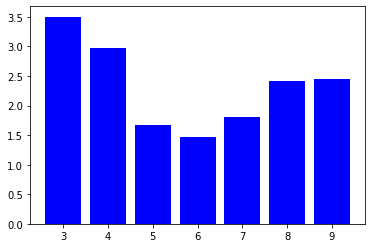

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(trainSamples, trainLabels)    
modelResults = model.predict(testSamples)

print('MSE=',mean_squared_error(testLabels, modelResults))
print('R2=',r2_score(testLabels, modelResults))
errors = np.abs(modelResults-testLabels)

import matplotlib.pyplot as plt
plt.bar(testLabels, errors, color='blue', linewidth=3)

for i in range(len(testSamples)):
    if(testLabels[i]==3 or testLabels[i]==9):
        print(testLabels[i],' > ',modelResults[i]," error=",abs(modelResults[i]-testLabels[i]))


# Weighted results

Class labels: [3. 4. 5. 6. 7. 8. 9.]
Class weights: [ 34.98095238   4.30093677   0.48006796   0.31839459   0.79502165
   4.00545256 131.17857143]
MSE= 1.07054703454415
myMSE= 1.07054703454415
R2= -0.36658555034904095
3.0  >  4.285365307302413  error= 1.2853653073024134
3.0  >  5.737537618285273  error= 2.7375376182852733
3.0  >  7.248964692810773  error= 4.248964692810773
9.0  >  7.5755898746772345  error= 1.4244101253227655
3.0  >  8.110509275528784  error= 5.110509275528784
3.0  >  6.775433840275923  error= 3.775433840275923


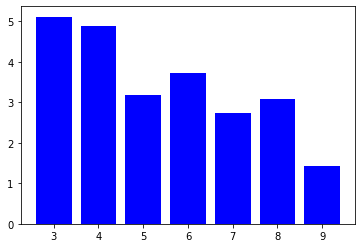

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(trainLabels),y=trainLabels)
print("Class labels:",np.unique(labels))
print("Class weights:",class_weights)

weights = np.ones([len(trainLabels)]) # initialize all weights to 1
for i, label in enumerate(trainLabels):
    weights[i] *= class_weights[int(label-3)] # the first label is 3!

model = linear_model.LinearRegression()
#model = linear_model.Ridge()  ## another algorithm
model.fit(trainSamples, trainLabels
         ,sample_weight=weights ## use weights!
         )    
modelResults = model.predict(testSamples)

print('MSE=',mean_squared_error(testLabels, modelResults))
print('myMSE=',np.sum((modelResults-testLabels)**2)/len(testLabels))
print('R2=',r2_score(testLabels, modelResults))
errors = np.abs(modelResults-testLabels)

import matplotlib.pyplot as plt
plt.bar(testLabels, errors, color='blue', linewidth=3)

for i in range(len(testSamples)):
    if(testLabels[i]==3 or testLabels[i]==9):
        print(testLabels[i],' > ',modelResults[i]," error=",abs(modelResults[i]-testLabels[i]))
